### Importando bibliotecas que vão ser utilizadas

In [50]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importando a planilha e armazenando em um dataset

In [2]:
df = pd.read_csv('DataBase.csv')

In [3]:
df.head()

,order_created_at,order_number,order_status,customer_store_id,shipment_id,shipment_status,estimated_delivery_date,actual_delivery_date,store,delivery_by_merce,shipping_price,sold_amount,picked_amount,picked_cmv,rebate_amount
0,4/8/21 09:59:31,94783921,CANCELED,104b004e-f528-408c-9422-ef20e9984d44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.13,0.00,0.00,NaN
1,4/27/21 16:09:18,90898417,HANDED_OUT,d9143ad0-5f8a-43cb-8a13-cba6254101de,9985ecbb-33b9-4fcf-aca6-48c70630a8af,HANDED_OUT,2021-04-28,2021-04-28,Atacadão - Interlagos,True,0.0,543.86,336.40,382.26,NaN
2,4/14/21 18:58:23,18551849,CANCELED,b31be17e-b8c6-43d1-b1f7-64688b0ec6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.50,0.00,0.00,NaN
3,5/19/21 14:06:22,7465659,HANDED_OUT,6ffebe40-8f53-4b04-a793-3b227c5b0ab7,12962fc1-931c-428e-8440-66e8e566a578,HANDED_OUT,2021-05-21,2021-06-07,Atacadão - Online,False,0.0,683.10,637.56,658.55,"17,1882"
4,6/2/21 13:37:54,18696871,HANDED_OUT,84d293e8-2ae8-4233-96e3-a6b24f1db6f6,43fdc809-8b0b-4eca-a2ff-db7329e7cc8e,HANDED_OUT,2021-06-03,2021-06-03,Adega Félix,True,0.0,153.73,143.48,146.23,NaN


## Pergunta 1

Preencha as colunas de D até G da tabela a seguir com os KPIs de cada linha

|   | abr/21  | mai/21   | jun/21   | Q2.2021   | jul/21   |
|-|:-:|:-:|:-:|:-:|:-:|
| % de pedidos criados   |   |   |   |   |   |
| % de entregas finalizadas  |   |   |   |   |   |
| % de clientes com entrega finalizada  |   |   |   |   |   |
|   GMV  |   |   |   |   |   |
| % de entregas próprias   |   |   |   |   |   |
  
  

In [4]:
df['order_status'].count() #Quantidade de linhas

10547

In [5]:
df_backup = df.copy() #Faz um backup do dataframe, para eventuais problemas durante as análises

In [6]:
df.head()
#df.dropna(axis=1)

,order_created_at,order_number,order_status,customer_store_id,shipment_id,shipment_status,estimated_delivery_date,actual_delivery_date,store,delivery_by_merce,shipping_price,sold_amount,picked_amount,picked_cmv,rebate_amount
0,4/8/21 09:59:31,94783921,CANCELED,104b004e-f528-408c-9422-ef20e9984d44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.13,0.00,0.00,NaN
1,4/27/21 16:09:18,90898417,HANDED_OUT,d9143ad0-5f8a-43cb-8a13-cba6254101de,9985ecbb-33b9-4fcf-aca6-48c70630a8af,HANDED_OUT,2021-04-28,2021-04-28,Atacadão - Interlagos,True,0.0,543.86,336.40,382.26,NaN
2,4/14/21 18:58:23,18551849,CANCELED,b31be17e-b8c6-43d1-b1f7-64688b0ec6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.50,0.00,0.00,NaN
3,5/19/21 14:06:22,7465659,HANDED_OUT,6ffebe40-8f53-4b04-a793-3b227c5b0ab7,12962fc1-931c-428e-8440-66e8e566a578,HANDED_OUT,2021-05-21,2021-06-07,Atacadão - Online,False,0.0,683.10,637.56,658.55,"17,1882"
4,6/2/21 13:37:54,18696871,HANDED_OUT,84d293e8-2ae8-4233-96e3-a6b24f1db6f6,43fdc809-8b0b-4eca-a2ff-db7329e7cc8e,HANDED_OUT,2021-06-03,2021-06-03,Adega Félix,True,0.0,153.73,143.48,146.23,NaN


In [7]:
#Converte o campo order_created_at que esta no formato 'str' para o formato datetime
df['order_created_at'] = pd.to_datetime(df['order_created_at']) 
df.head()

,order_created_at,order_number,order_status,customer_store_id,shipment_id,shipment_status,estimated_delivery_date,actual_delivery_date,store,delivery_by_merce,shipping_price,sold_amount,picked_amount,picked_cmv,rebate_amount
0,2021-04-08 09:59:31,94783921,CANCELED,104b004e-f528-408c-9422-ef20e9984d44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.13,0.00,0.00,NaN
1,2021-04-27 16:09:18,90898417,HANDED_OUT,d9143ad0-5f8a-43cb-8a13-cba6254101de,9985ecbb-33b9-4fcf-aca6-48c70630a8af,HANDED_OUT,2021-04-28,2021-04-28,Atacadão - Interlagos,True,0.0,543.86,336.40,382.26,NaN
2,2021-04-14 18:58:23,18551849,CANCELED,b31be17e-b8c6-43d1-b1f7-64688b0ec6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.50,0.00,0.00,NaN
3,2021-05-19 14:06:22,7465659,HANDED_OUT,6ffebe40-8f53-4b04-a793-3b227c5b0ab7,12962fc1-931c-428e-8440-66e8e566a578,HANDED_OUT,2021-05-21,2021-06-07,Atacadão - Online,False,0.0,683.10,637.56,658.55,"17,1882"
4,2021-06-02 13:37:54,18696871,HANDED_OUT,84d293e8-2ae8-4233-96e3-a6b24f1db6f6,43fdc809-8b0b-4eca-a2ff-db7329e7cc8e,HANDED_OUT,2021-06-03,2021-06-03,Adega Félix,True,0.0,153.73,143.48,146.23,NaN


In [8]:
df['month'] = pd.DatetimeIndex(df['order_created_at']).month


In [33]:
df.tail()
df.sort_values('order_created_at',ascending=False)



,order_created_at,order_number,order_status,customer_store_id,shipment_id,shipment_status,estimated_delivery_date,actual_delivery_date,store,delivery_by_merce,shipping_price,sold_amount,picked_amount,picked_cmv,rebate_amount,month,COUNTER,GMV,GMV_week
4976,2021-06-30 22:12:10,10260098,HANDED_OUT,e6e84529-dcf2-4655-8171-d689b4e3e9d9,43733e01-6e66-4abd-a245-7aeb6939475c,HANDED_OUT,2021-07-05,2021-07-03,Adega Barreto,True,0.0,31.39,29.29,29.71,NaN,6,1,0.00,0.00
5979,2021-06-30 22:12:10,10260098,HANDED_OUT,e6e84529-dcf2-4655-8171-d689b4e3e9d9,5b372690-0ab7-4756-b9c0-b23fb80c901c,HANDED_OUT,2021-07-05,2021-07-02,Giga - Online,True,0.0,102.76,67.57,68.03,"3,9456",6,1,0.00,0.00
5371,2021-06-30 22:12:10,10260098,HANDED_OUT,e6e84529-dcf2-4655-8171-d689b4e3e9d9,0db2a145-e22f-4f9e-b8b7-be0586e951c5,CANCELED,2021-07-05,NaN,Atacadão - Osasco,True,0.0,26.93,0.00,0.00,NaN,6,1,0.00,0.00
8549,2021-06-30 22:12:10,10260098,HANDED_OUT,e6e84529-dcf2-4655-8171-d689b4e3e9d9,a6da871d-bf78-4aa6-90bf-32ca0ac77c05,HANDED_OUT,2021-07-05,2021-07-02,Atacadão - Interlagos,True,15.0,288.84,199.58,210.63,NaN,6,1,4332.60,4332.60
4150,2021-06-30 21:24:35,59989850,HANDED_OUT,1ab6ccec-36a9-481c-81ce-0c4c3a073f17,cd1ab004-aa1a-4db2-9790-581a4d2a494c,HANDED_OUT,2021-07-05,2021-07-16,Manikraft,False,0.0,186.60,174.16,180.08,"10,4448",6,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,2021-04-01 11:54:24,66021968,HANDED_OUT,6ffebe40-8f53-4b04-a793-3b227c5b0ab7,e0cd3d1e-959e-4580-a7d5-a2cf934bd6ef,HANDED_OUT,2021-04-06,2021-04-08,Atacadão - Interlagos,True,15.0,NaN,"6,148.95","6,786.77",NaN,4,1,NaN,NaN
6471,2021-04-01 11:49:54,47894890,HANDED_OUT,bc4a3043-1e51-4200-9006-226177761365,2570a34c-cd1e-48f7-b8c1-f75b7e803f87,HANDED_OUT,2021-04-06,2021-04-06,Atacadão - Osasco,True,15.0,574.24,535.96,656.07,NaN,4,1,8613.60,8613.60
7187,2021-04-01 11:47:45,59521339,HANDED_OUT,ecf4e3e7-5c6b-491d-a8ab-9fc5b4d36939,a7476273-3c8e-403d-b75c-88cf52bed8d9,HANDED_OUT,2021-04-06,2021-04-06,Atacadão - Osasco,True,15.0,NaN,"2,542.00","2,795.79",NaN,4,1,NaN,NaN
282,2021-04-01 09:10:32,83648394,HANDED_OUT,76616a73-096d-4616-ab79-e4bcae37ac8f,27299256-5e6c-401b-8a4e-b93f9bcf1799,HANDED_OUT,2021-04-06,2021-04-06,Atacadão - Interlagos,True,15.0,NaN,"1,044.67","1,245.46",NaN,4,1,NaN,NaN


In [10]:
#Resposta da primeira linha do problema 
MesTotal=df.groupby('month').count()
x=df[(df['order_status']=='CANCELED') ].groupby('month').count()
y=df[(df['order_status']=='REJECTED') ].groupby('month').count()
z=y.reindex_like(x).fillna(0) + x.fillna(0).fillna(0)
Total=(100-(z/MesTotal*100))
Q2=(100-(z.sum())/MesTotal.sum()*100)
Total['order_created_at'].round(0), Q2['order_created_at'].round(0)   


(month
 4    85.0
 5    90.0
 6    96.0
 Name: order_created_at, dtype: float64,
 91.0)

In [11]:
#Resposta da segunda linha do problema 1

QuantMes=df.groupby('month').count()  #Calcula a quantidade de entradas por mês
x=df[(df['shipment_status']=='HANDED_OUT') ].groupby('month').count() # Calcula a quantidade de entregas finalizadas e organiza por mês
Total = (x/QuantMes)*100                                             # Razão entre entregas finalizadas e entregas totais
Q2=(x.sum()/QuantMes.sum())*100                                      #Soma do segundo trimestre.
Total['shipment_status'].round(0),Q2['shipment_status'].round(0)

(month
 4    97.0
 5    87.0
 6    90.0
 Name: shipment_status, dtype: float64,
 91.0)

In [12]:
#Resposta da terceira linha do problema 1

df['COUNTER'] =1  #initially, set that counter to 1.#
Store = df[(df['shipment_status']=='HANDED_OUT') ].groupby(['month','store'])['COUNTER'].count() #Conta a quantidade stores que recberam a encomenda
TotalStore = df.groupby(['month','store'])['COUNTER'].sum()  #Soma valores unicos por mês de store
SubTotal = (TotalStore - Store).isin([0]).groupby('month').sum() #Subtrai A quantidade de stores por mês menos a quantidade de stores que tem todas as entregas 
TotalStore = TotalStore.groupby('month').count() #Agrupa por mês a quantidade de stores unicos
Total = (SubTotal)/TotalStore*100 #Calcula a porcentagem de stores com todas as entregas feitas por mês
#----------------------------------------------------------------------------------------------------------------
StoreQ2=df[(df['shipment_status']=='HANDED_OUT') ].groupby('store')['COUNTER'].count()
TotalStoreQ2 = df.groupby(['store'])['COUNTER'].sum()
SubTotalQ2 = (TotalStoreQ2 - StoreQ2).isin([0]).groupby('store').sum()
TotalQ2 = (SubTotalQ2.sum())/TotalStoreQ2.sum()*100 
Total.round(0), TotalQ2.round(0)



(month
 4    25.0
 5    58.0
 6    55.0
 Name: COUNTER, dtype: float64,
 0.0)

In [13]:
#Resposta da quinta linha do problema 1
Shiptotal=df.groupby('month').count()
ShipTrue= df[(df['delivery_by_merce']==True) ].groupby('month').count()
Total = (ShipTrue/Shiptotal)*100

#========================================================================
ShiptotalQ2=df['delivery_by_merce'].count()
ShipTrueQ2= df[(df['delivery_by_merce']==True)].count()
TotalQ2 = ShipTrueQ2/ShiptotalQ2*100
Total['delivery_by_merce'].round(1),TotalQ2['delivery_by_merce'].round(1)

(month
 4    99.8
 5    94.5
 6    88.7
 Name: delivery_by_merce, dtype: float64,
 93.1)

In [14]:
df['sold_amount'] = pd.to_numeric(df['sold_amount'],errors='coerce')
df['GMV'] = df['shipping_price'] * df['sold_amount']
df.groupby('month').sum(),df['GMV'].sum()


(       order_number  shipping_price  sold_amount  COUNTER         GMV
 month                                                                
 4      135766749580         26205.0    805477.94     2692  8475393.30
 5      161901802387         22260.0    864861.13     3267  6691431.75
 6      231748896755         14925.0   1096212.48     4588  3355411.20,
 18522236.25)

## Pergunta 2

Faça um gráfico da evolução semanal do GMV entregue
  
  

In [47]:
df.resample('W-Thu', on='order_created_at',origin='start_day').sum()

,order_number,shipping_price,sold_amount,month,COUNTER,GMV,GMV_week
order_created_at,,,,,,,
2021-04-01,723254350,180.0,4041.55,56,14,45786.15,45786.15
2021-04-08,27049805741,4725.0,153330.16,2104,526,1555182.00,1555182.00
2021-04-15,42558397580,7695.0,252602.25,3408,852,2520582.15,2520582.15
2021-04-22,28076970577,6225.0,162838.19,2180,545,1837162.95,1837162.95
2021-04-29,34552937898,7020.0,216000.55,2796,699,2388748.20,2388748.20
2021-05-06,35577204382,6525.0,221952.73,3464,704,2231923.95,2231923.95
2021-05-13,33744664647,6015.0,204414.46,3415,683,1847845.05,1847845.05
2021-05-20,30017919909,5820.0,174135.89,3245,649,1668398.85,1668398.85
2021-05-27,41569633708,2955.0,183922.63,4135,827,773985.15,773985.15


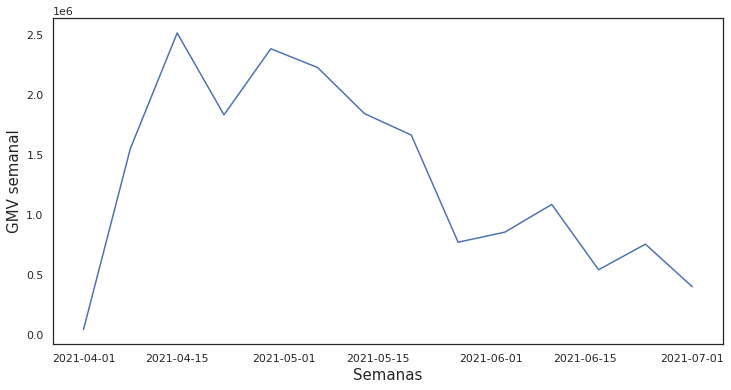

In [70]:
Samples = df.resample('W-Thu', on='order_created_at',origin='start_day').sum()
plt.figure(figsize=(12,6))
sns.lineplot(data=Samples["GMV_week"])
plt.ylabel("GMV semanal", fontsize= 15)
plt.xlabel("Semanas", fontsize= 15)
plt.show()
